# Simple Linear Regression

Linear Regression for 1 Predictor/Independent Variable/Feature X1

$ y = f(X_1) = B_0 + B_1 X_1 + \epsilon $

$\text{Where:}$
   
- $y = \text{Output or Dependent Variable or Prediction}$  
- $y = f(X_1): \text{Y is the function of } X_1$  
- $B_0 = \text{Intercept or if X is 0 What Y must be equal to}$  
- $B_1 = \text{Coefficient or Slope or Weight of } X_1$  
- $X_1 = \text{Is the Independent Variable or Predictor or Feature}$
- $\epsilon = \text{Randomness or Noise or Some Variability in outcome}$  

This is just the simplest learning model. In reality, the real data is almost always non-linear and full of independent variables.

## Understanding High-Level Process of Implementation:

1. Generate Synthetic Data or Acquire Data.
2. Identify Predictor(s) (Independent Variable) and Target Feature (Dependent Variable).
3. Fit a Model on a Portion of Data (Training Set) to Find a Mathematical Relationship.  
    3.1. Using StatsModel's OLS (Ordinary Least Squares)  
    3.2. Using Scikit-Learn’s LinearRegression  
4. Make Predictions on Unseen Data (Test Set).
5. Evaluate the Model Performance by Comparing Original & Predicted Values.
6. Compare Results Visually.
7. Check for Underfitting or Overfitting.
8. Tune Hyper Parameters if Required and Applicable.
9. Compare Final Results.

In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [145]:
# Avoid any NaN warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Generate Synthetic Data for the below relationship

$ y = f(x) = 4 + 3x + noise $

In [146]:
np.random.seed(10)

X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X + np.random.randn(1000, 1) # y = 4 + 3x + noise

df = pd.DataFrame(data = {'X' : X.flatten(), 'y' : y.flatten()})

# Replace `inf` values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.head()

,X,y
0,1.542641,9.725045
1,0.041504,3.585934
2,1.267296,9.997486
3,1.497608,7.790180
4,0.997014,6.930443


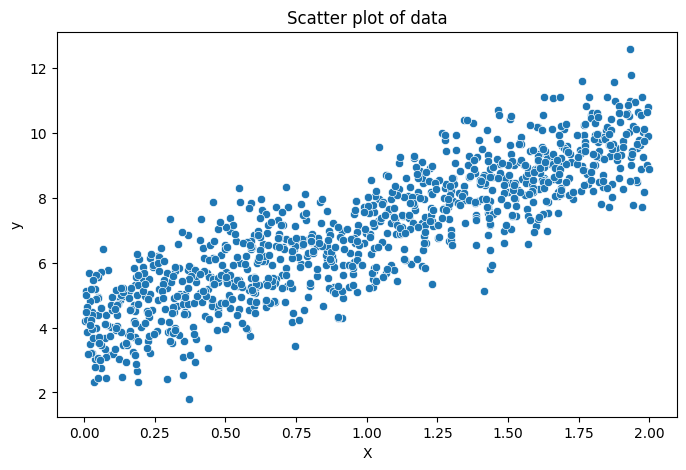

In [147]:
# Generate an scatter plot of data
fig = plt.figure(figsize=(8, 5))
sns.scatterplot(data = df, x = 'X', y = 'y')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of data')
plt.show()

In [148]:
# Split data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(df[['X']], df['y'], test_size=0.3, random_state=10)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 1), (700,), (300, 1), (300,))

## Fit a Linear Model Using: OLS (Ordinary Least Square) from Stats Model

In [149]:
# Add an intercept term to X train and X test.
# This is required by OLS model
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [150]:
ols_model = sm.OLS(y_train, X_train_sm)
ols_model = ols_model.fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2272.
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          1.18e-221
Time:                        23:30:25   Log-Likelihood:                -973.12
No. Observations:                 700   AIC:                             1950.
Df Residuals:                     698   BIC:                             1959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9436      0.073     54.218      0.0

In [151]:
y_pred_ols_train = ols_model.predict(X_train_sm)
y_pred_ols_test = ols_model.predict(X_test_sm)

In [152]:
r2_train_ols = r2_score(y_train, y_pred_ols_train)
mse_train_ols = mean_squared_error(y_train, y_pred_ols_train)
r2_test_ols = r2_score(y_test, y_pred_ols_test)
mse_test_ols = mean_squared_error(y_test, y_pred_ols_test)

print(f"R^2 For Training Data = {r2_train_ols:.4f}")
print(f"MSE For Training Data = {mse_train_ols:.4f}")
print("")
print(f"R^2 For Testing Data = {r2_test_ols:.4f}")
print(f"MSE For Testing Data = {mse_test_ols:.4f}")

R^2 For Training Data = 0.7650
MSE For Training Data = 0.9441

R^2 For Testing Data = 0.7583
MSE For Testing Data = 1.0053


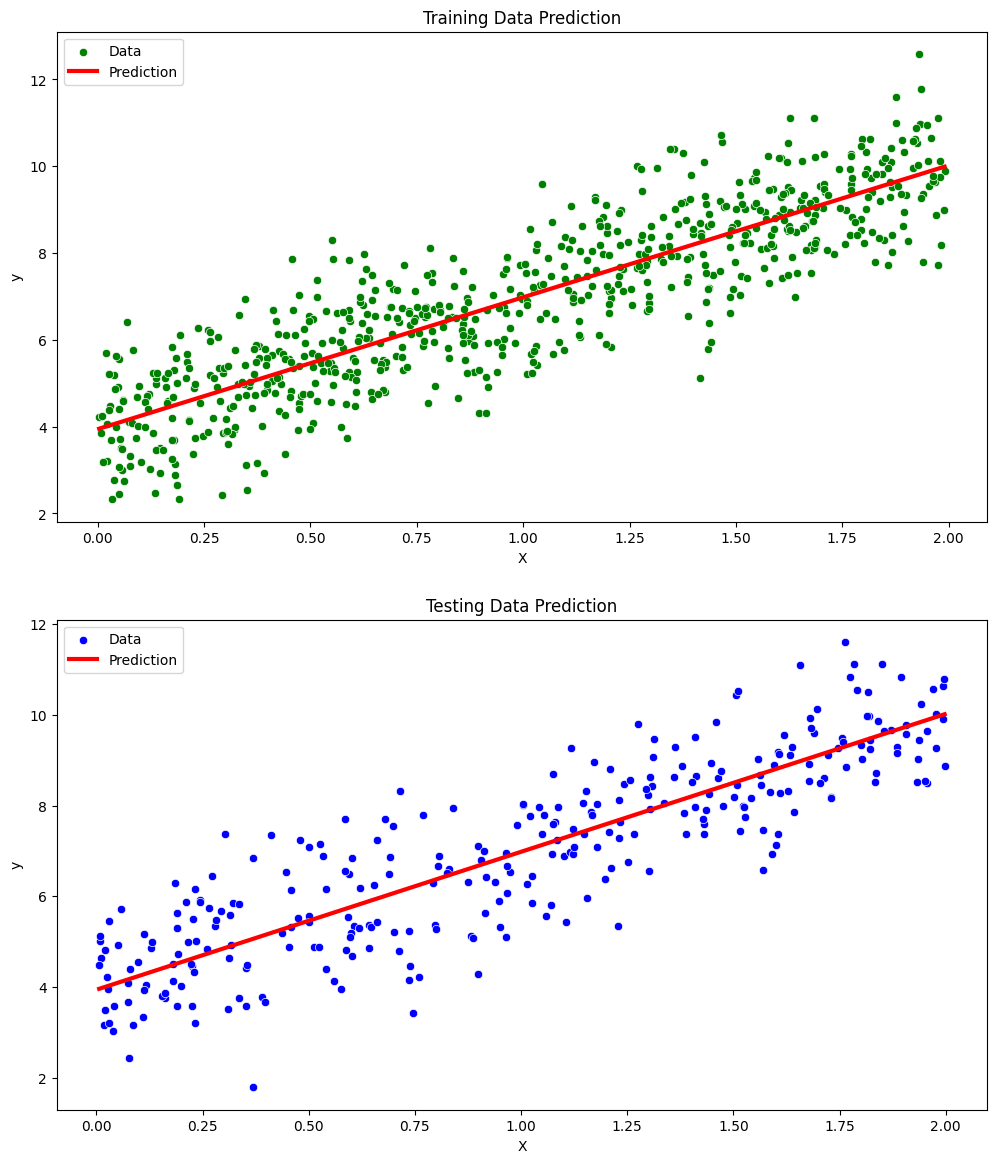

In [153]:
# sub plots
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Original Trainig and Test Data
sns.scatterplot(x = X_train_sm['X'], y = y_train, color = 'green', label = 'Data', ax=ax[0])
sns.lineplot(x = X_train_sm['X'], y = y_pred_ols_train, color = 'red', linestyle = 'solid', linewidth='3', label = 'Prediction', ax=ax[0])
ax[0].set_title('Training Data Prediction')

# Predicted Training and Test Data
sns.scatterplot(x = X_test_sm['X'], y = y_test, color = 'blue', label = 'Data', ax=ax[1])
sns.lineplot(x = X_test_sm['X'], y = y_pred_ols_test, color = 'red', linewidth='3', label = 'Prediction', ax=ax[1])
ax[1].set_title('Testing Data Prediction')

plt.show()

## Fit a LinearModel using: LinearRegression from SkLearn

In [154]:
linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)

print(f"Model Intercept = {linear_model.intercept_:.4f}")
# It returns an array but we have only 1 feature,
# so only 1 value is returend at index 0
print(f"Model Coefficents = {linear_model.coef_[0]:.4f}")


Model Intercept = 3.9436
Model Coefficents = 3.0381


In [155]:
# Predict train and test.

y_pred_lr_train = linear_model.predict(X_train)
y_pred_lr_test = linear_model.predict(X_test)

In [156]:
# Get MSE and R2 for Train and Test.

r2_train_lr = r2_score(y_train, y_pred_lr_train)
mse_train_lr = mean_squared_error(y_train, y_pred_lr_train)
r2_test_lr = r2_score(y_test, y_pred_lr_test)
mse_test_lr = mean_squared_error(y_test, y_pred_lr_test)

print(f"R^2 For Training Data = {r2_train_lr:.4f}")
print(f"MSE For Training Data = {mse_train_lr:.4f}")
print("")
print(f"R^2 For Testing Data = {r2_test_lr:.4f}")
print(f"MSE For Testing Data = {mse_test_lr:.4f}")

R^2 For Training Data = 0.7650
MSE For Training Data = 0.9441

R^2 For Testing Data = 0.7583
MSE For Testing Data = 1.0053


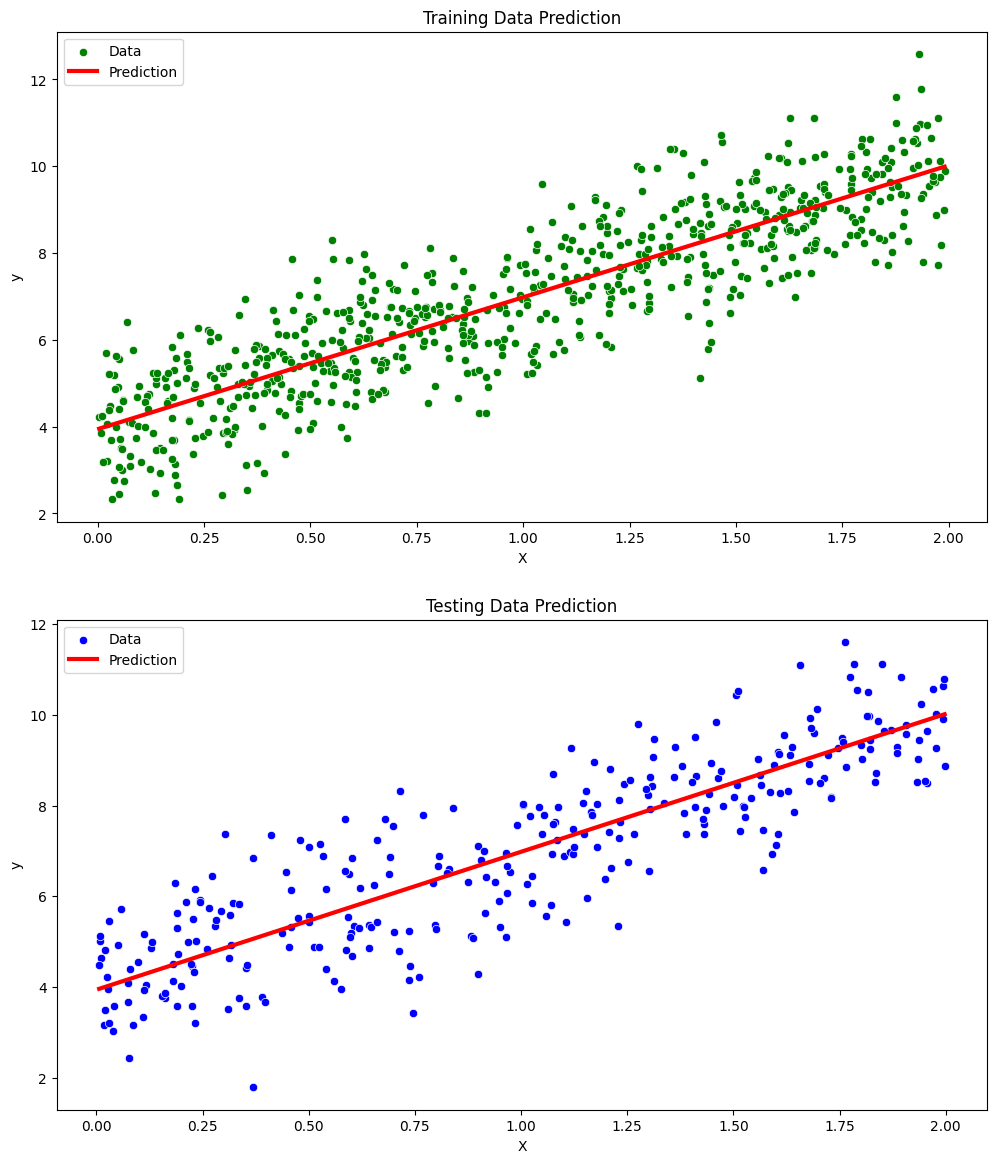

In [157]:
# sub plots
fig, ax = plt.subplots(2, 1, figsize=(12, 14))

# Original Trainig and Test Data
sns.scatterplot(x = X_train['X'], y = y_train, color = 'green', label = 'Data', ax=ax[0])
sns.lineplot(x = X_train['X'], y = y_pred_lr_train, color = 'red', linestyle = 'solid', linewidth='3', label = 'Prediction', ax=ax[0])
ax[0].set_title('Training Data Prediction')

# Predicted Training and Test Data
sns.scatterplot(x = X_test['X'], y = y_test, color = 'blue', label = 'Data', ax=ax[1])
sns.lineplot(x = X_test['X'], y = y_pred_lr_test, color = 'red', linewidth='3', label = 'Prediction', ax=ax[1])
ax[1].set_title('Testing Data Prediction')

plt.show()

## Comparing Both Models.

Both the models diplayed simillar performance for Simple Linear Regression

In [158]:
print("=====================")
print("OLS Model Performance")
print("=====================")
print(f"R^2 For Training Data = {r2_train_ols:.4f}")
print(f"MSE For Training Data = {mse_train_ols:.4f}")
print("")
print(f"R^2 For Testing Data = {r2_test_ols:.4f}")
print(f"MSE For Testing Data = {mse_test_ols:.4f}")

print("")
print("===================================")
print("Linear Regression Model Performance")
print("===================================")
print(f"R^2 For Training Data = {r2_train_lr:.4f}")
print(f"MSE For Training Data = {mse_train_lr:.4f}")
print("")
print(f"R^2 For Testing Data = {r2_test_lr:.4f}")
print(f"MSE For Testing Data = {mse_test_lr:.4f}")

OLS Model Performance
R^2 For Training Data = 0.7650
MSE For Training Data = 0.9441

R^2 For Testing Data = 0.7583
MSE For Testing Data = 1.0053

Linear Regression Model Performance
R^2 For Training Data = 0.7650
MSE For Training Data = 0.9441

R^2 For Testing Data = 0.7583
MSE For Testing Data = 1.0053
